In [9]:
import pandas as pd
import numpy as np

In [11]:
#1. Data Loading and Exploration
df = pd.read_csv("adult_with_headers (1).csv")
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
#Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
#Summary Statistics
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [17]:
#Check Missing Values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [19]:
df.replace(" ?", np.nan, inplace=True)

In [21]:
#Check Missing Values Again
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [89]:
categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0],inplace=True)

In [91]:
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns
numerical_cols

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'capital_diff', 'capital_gain_log'],
      dtype='object')

In [93]:
#a) Standard Scaling
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
df_std_scaled = df.copy()
df_std_scaled[numerical_cols] = std_scaler.fit_transform(df[numerical_cols])

In [95]:
#b) Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_cols] = minmax_scaler.fit_transform(df[numerical_cols])


In [97]:
#Separate Categorical Features by Cardinality
cat_unique_counts = df[categorical_cols].nunique()
cat_unique_counts

Series([], dtype: float64)

In [99]:
#a) One-Hot Encoding(less than 5 categories)
low_cardinality_cols = cat_unique_counts[cat_unique_counts < 5].index

df_onehot = pd.get_dummies(df, columns=low_cardinality_cols, drop_first=True)


In [101]:
#b) Label Encoding
from sklearn.preprocessing import LabelEncoder

high_cardinality_cols = cat_unique_counts[cat_unique_counts >= 5].index

le = LabelEncoder()
for col in high_cardinality_cols:
    df_onehot[col] = le.fit_transform(df_onehot[col])


In [154]:
#a) Create New Features
#1: Capital Gain Indicator
df_onehot["capital_gain_flag"] = np.where(df_onehot["capital_gain"] > 0, 1, 0)

In [156]:
df_onehot["hours_category"] = pd.cut(
    df_onehot["hours_per_week"],
    bins=[0, 30, 40, 100],
    labels=["Part-time", "Full-time", "Over-time"]
)


In [158]:
df_onehot = pd.get_dummies(df_onehot, columns=["hours_category"], drop_first=True)


In [160]:
df["capital_gain_flag"] = df["capital_gain"].apply(lambda x: 1 if x > 0 else 0)


In [166]:
#Transformation of Skewed Numerical Feature
import numpy as np

df["capital_gain_log"] = np.log1p(df["capital_gain"])

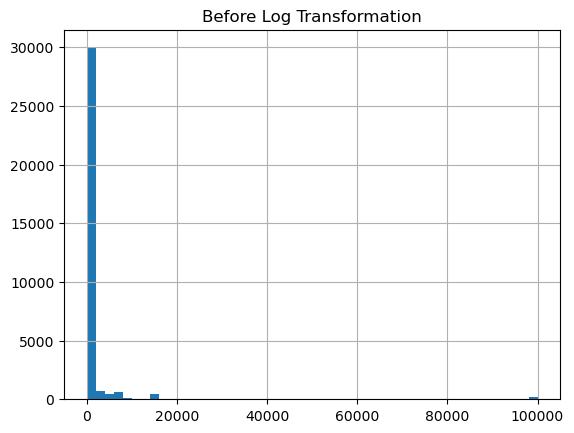

In [141]:
import matplotlib.pyplot as plt

df_onehot["capital_gain"].hist(bins=50)
plt.title("Before Log Transformation")
plt.show()

In [143]:
df_onehot["capital_gain_log"] = np.log1p(df_onehot["capital_gain"])

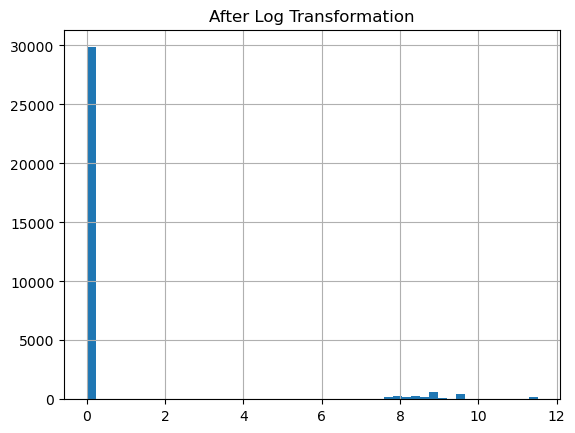

In [145]:
df_onehot["capital_gain_log"].hist(bins=50)
plt.title("After Log Transformation")
plt.show()

In [147]:
df_onehot.shape

(32561, 24)